# Heart Attack Prediction 💔

Dataset : https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [2]:
df = pd.read_csv('/content/heart.csv')
df.head(6)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1


In [3]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [4]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [5]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [6]:
X[0]

array([ 63. ,   1. ,   3. , 145. , 233. ,   1. ,   0. , 150. ,   0. ,
         2.3,   0. ,   0. ,   1. ])

In [7]:
y[:10]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

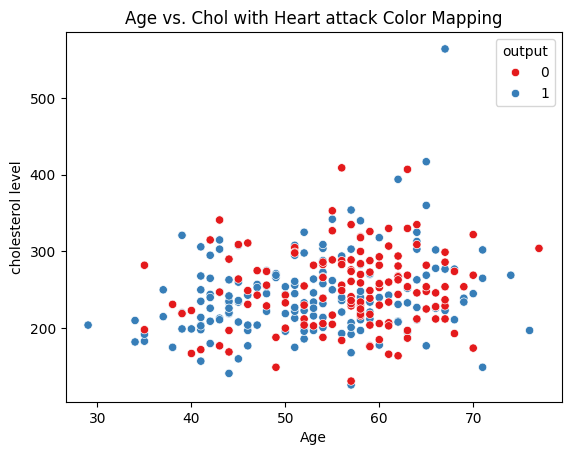

In [8]:
sns.scatterplot(x='age', y='chol', hue='output', data=df, palette='Set1')

plt.xlabel('Age')
plt.ylabel('cholesterol level')
plt.title('Age vs. Chol with Heart attack Color Mapping')
plt.show()

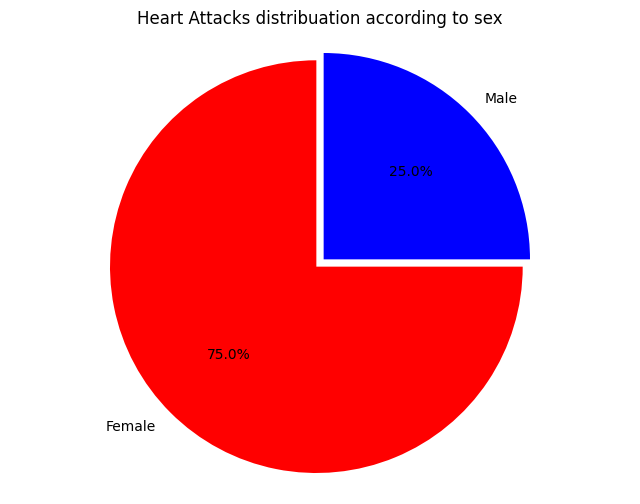

In [9]:
heart_attack_counts = df.groupby(['sex', 'output']).size().unstack()

colors = ['blue', 'red']
labels = heart_attack_counts.columns
explode = (0.05, 0)

plt.figure(figsize=(8, 6))
plt.pie(heart_attack_counts.loc[0], labels=['Male', 'Female'], autopct='%1.1f%%', colors=colors, explode=explode)
plt.title('Heart Attacks distribuation according to sex')
plt.axis('equal')
plt.show()

In [10]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax);
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix');
    ax.xaxis.set_ticklabels(['Negative', 'Positive']); ax.yaxis.set_ticklabels(['Negative', 'Positive'])
    plt.show()

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.15,
                                                    random_state=42)

In [12]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_jobs=-1)
clf.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1)

In [13]:
y_pred = clf.predict(X_test)

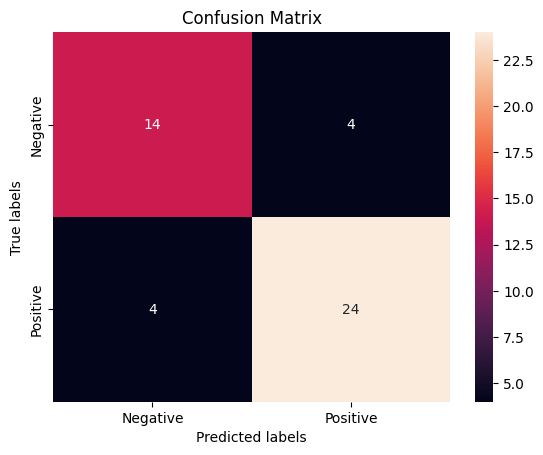

In [14]:
plot_confusion_matrix(y_test, y_pred)

In [15]:
clf_score = clf.score(X_test, y_test)
clf_score

0.8260869565217391

In [16]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=20, activation='relu'),
    tf.keras.layers.Dense(units=20, activation='relu'),
    tf.keras.layers.Dense(units=20, activation='relu'),
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])

model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [17]:
model.fit(X_train, y_train, epochs=50)

Epoch 1/50
9/9 [==============================] - 4s 11ms/step - loss: 7.2702 - accuracy: 0.4669
Epoch 2/50
9/9 [==============================] - 0s 11ms/step - loss: 1.6377 - accuracy: 0.5759
Epoch 3/50
9/9 [==============================] - 0s 15ms/step - loss: 1.5213 - accuracy: 0.5720
Epoch 4/50
9/9 [==============================] - 0s 10ms/step - loss: 0.9768 - accuracy: 0.6070
Epoch 5/50
9/9 [==============================] - 0s 4ms/step - loss: 0.7532 - accuracy: 0.5914
Epoch 6/50
9/9 [==============================] - 0s 9ms/step - loss: 0.7464 - accuracy: 0.5292
Epoch 7/50
9/9 [==============================] - 0s 12ms/step - loss: 0.7525 - accuracy: 0.5914
Epoch 8/50
9/9 [==============================] - 0s 14ms/step - loss: 0.6453 - accuracy: 0.6537
Epoch 9/50
9/9 [==============================] - 0s 9ms/step - loss: 0.6456 - accuracy: 0.6498
Epoch 10/50
9/9 [==============================] - 0s 6ms/step - loss: 0.6883 - accuracy: 0.5914
Epoch 11/50
9/9 [================

In [18]:
y_pred = model.predict(X_test)
y_pred = y_pred >= 0.5

2/2 [==============================] - 0s 9ms/step


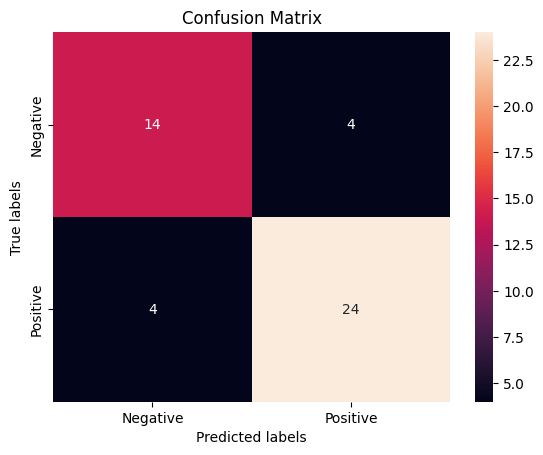

In [19]:
plot_confusion_matrix(y_test, y_pred)

In [20]:
from sklearn.metrics import accuracy_score

nn_score = accuracy_score(y_test, y_pred)
nn_score

0.8260869565217391

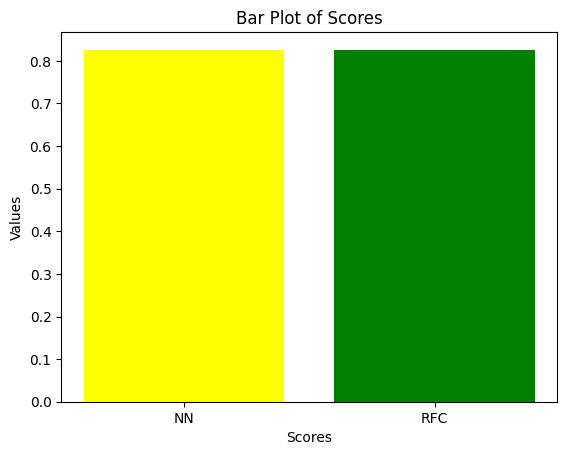

In [21]:
labels = ['NN', 'RFC']
scores = [nn_score, clf_score]

plt.bar(labels, scores, color=['yellow', 'green'])
plt.title('Bar Plot of Scores')
plt.xlabel('Scores')
plt.ylabel('Values')
plt.show()